# Regresión

Autores:
- Sergio de la Cruz
- Pablo Ramiro Foronda
- Luciano Pereyra

# Enunciado

En esta práctica, se os proporcionará un conjunto de datos con características de automóviles de segunda mano en distintos países. El objetivo es preprocesar los datos y construir un modelo capaz de predecir los precios de coches que nunca haya visto.

Además, se llevará a cabo una **competición** en kaggle, podéis inscribiros en este siguiente [enlace](https://www.kaggle.com/t/95194d38b1f9447fa9e3b51b8e9d575f)




La estructura del proyecto debe ser la siguiente:

- Carga y limpieza de los datos
- Visualización
- Preprocesamiento
- Pruebas de modelos (razonar sobre los resultados)
- Conclusiones
- Creación de submission



Se valorarán:

- Número y variedad de experimentos con sus conclusiones.
- Calidad del preprocesamiento (y su razonamiento).
- Capacidad de generalización del modelo final.
- Trabajo en equipo (en grupos de más de 1 integrante, claro).
- Creatividad en la solución.
- Claridad del .ipynb presentado en Moodle

# Carga y limpieza de los datos


Aunque se permite la carga de los datos de forma local, se recomienda emplear las siguientes URLs de gist por comodidad:

In [672]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import re

In [673]:
train_url = "https://gist.githubusercontent.com/w-dan/9c2f9a30d0517c58a08d5a7ef42ef2dd/raw/ee85f61926c9aeae5863369a13bb67e182a702ba/training.csv"
test_url = "https://gist.githubusercontent.com/w-dan/9c2f9a30d0517c58a08d5a7ef42ef2dd/raw/ee85f61926c9aeae5863369a13bb67e182a702ba/test.csv"

In [674]:
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

In [675]:
pd.set_option('display.max_columns', None)

In [676]:
train_df.head(30)

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Chevrolet Spark 1.0 LT,2011,130000,68519,Petrol,Dealer,Manual,First Owner,16.2 kmpl,995 CC,62.1 bhp,90.3Nm@ 4200rpm,5.0
1,2,Hyundai Verna 1.6 SX CRDi (O),2017,1050000,70000,Diesel,Dealer,Manual,First Owner,22.32 kmpl,1582 CC,126.32 bhp,259.8Nm@ 1900-2750rpm,5.0
2,3,Mahindra Scorpio S10 7 Seater,2016,1100000,60000,Diesel,Individual,Manual,First Owner,15.4 kmpl,2179 CC,120 bhp,280Nm@ 1800-2800rpm,7.0
3,4,Hyundai EON 1.0 Kappa Magna Plus Optional,2018,350000,10000,Petrol,Individual,Manual,Second Owner,20.3 kmpl,998 CC,68.05 bhp,94.14Nm@ 3500rpm,5.0
4,5,Maruti Swift Dzire VDI,2014,490000,50000,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
5,6,Ford Figo Diesel Titanium,2011,180000,125000,Diesel,Individual,Manual,Second Owner,20.0 kmpl,1399 CC,68 bhp,160Nm@ 2000rpm,5.0
6,7,Hyundai i10 Sportz Option,2009,199000,70000,Petrol,Individual,Manual,Second Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
7,8,Datsun RediGO T,2017,270000,31100,Petrol,Dealer,Manual,First Owner,22.7 kmpl,799 CC,53.64 bhp,72Nm@ 4386rpm,5.0
8,9,Nissan Terrano XV 110 PS,2014,525000,120000,Diesel,Individual,Manual,Second Owner,19.01 kmpl,1461 CC,108.5 bhp,248Nm@ 2250rpm,5.0
9,10,Maruti Alto LXi,2011,200000,73000,Petrol,Individual,Manual,First Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0


In [677]:
test_df

,id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Chevrolet Spark 1.0 LT,2011,68519,Petrol,Dealer,Manual,First Owner,16.2 kmpl,995 CC,62.1 bhp,90.3Nm@ 4200rpm,5.0
1,2,Hyundai Verna 1.6 SX CRDi (O),2017,70000,Diesel,Dealer,Manual,First Owner,22.32 kmpl,1582 CC,126.32 bhp,259.8Nm@ 1900-2750rpm,5.0
2,3,Mahindra Scorpio S10 7 Seater,2016,60000,Diesel,Individual,Manual,First Owner,15.4 kmpl,2179 CC,120 bhp,280Nm@ 1800-2800rpm,7.0
3,4,Hyundai EON 1.0 Kappa Magna Plus Optional,2018,10000,Petrol,Individual,Manual,Second Owner,20.3 kmpl,998 CC,68.05 bhp,94.14Nm@ 3500rpm,5.0
4,5,Maruti Swift Dzire VDI,2014,50000,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,809,Mahindra Xylo E4 BS III,2014,78000,Diesel,Individual,Manual,First Owner,11.68 kmpl,2498 CC,112 bhp,260Nm@ 1800-2200rpm,7.0
809,810,Maruti Swift Dzire VDI,2016,75000,Diesel,Individual,Manual,Second Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
810,811,Maruti Swift VXI,2020,5000,Petrol,Individual,Manual,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
811,812,Audi Q5 35TDI Premium Plus,2018,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0


# Visualización

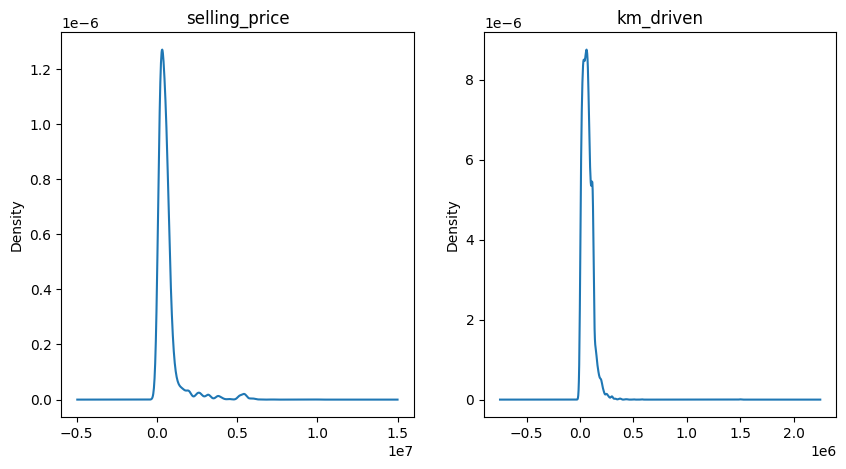

In [678]:


columnas_con= ['selling_price', 'km_driven']

fig, axs = plt.subplots(nrows=1, ncols=len(columnas_con), figsize=(10,5))
i=0
for column in columnas_con:
    axs[i].set_title(column)
    train_df[column].plot.kde(ax=axs[i])
    i+=1
    


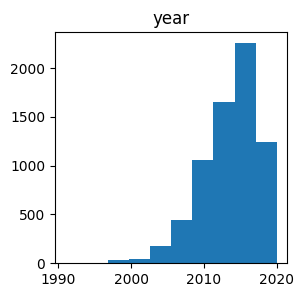

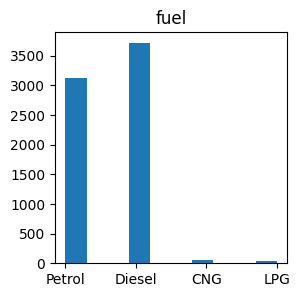

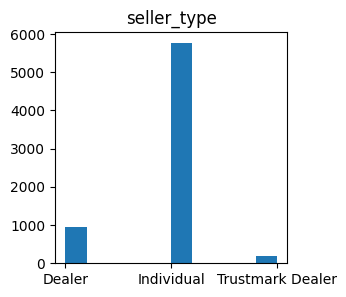

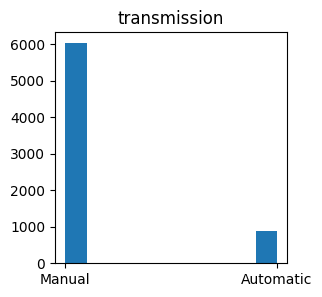

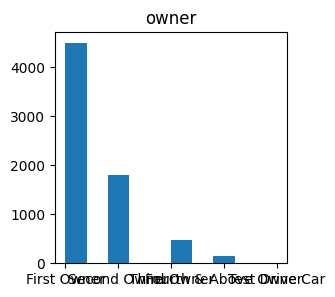

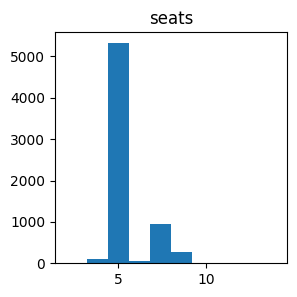

In [679]:

columnas_disc= ['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

i=0
for column in columnas_disc:
    fig, axs = plt.subplots(nrows=1, figsize=(3,3))
    plt.title(column)
    plt.hist(train_df[column])
    i+=1
# axs[1].set_title('StandardScaler')
# transformed_df = pd.DataFrame(StandardScaler().fit_transform(train_df[columnas_buscadas]))
# transformed_df.plot.kde(ax=axs[1], legend=False)

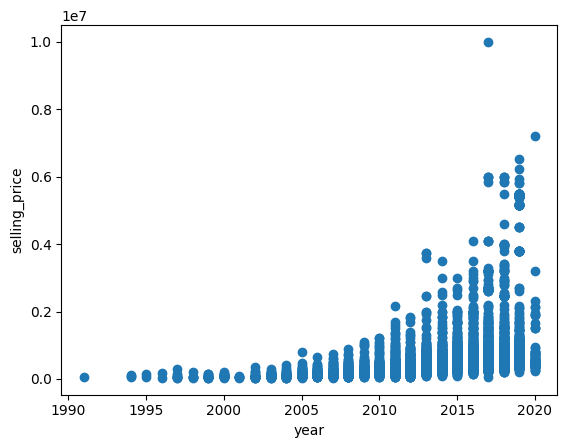

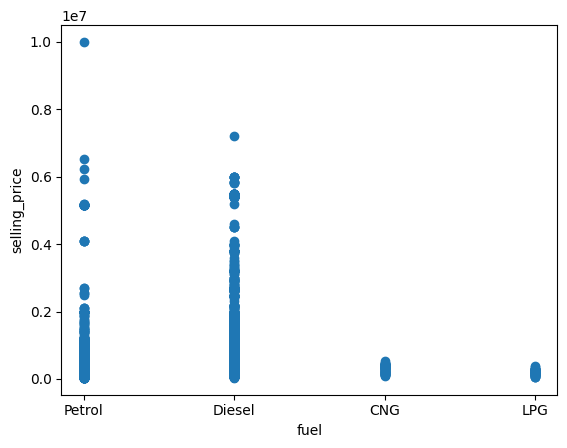

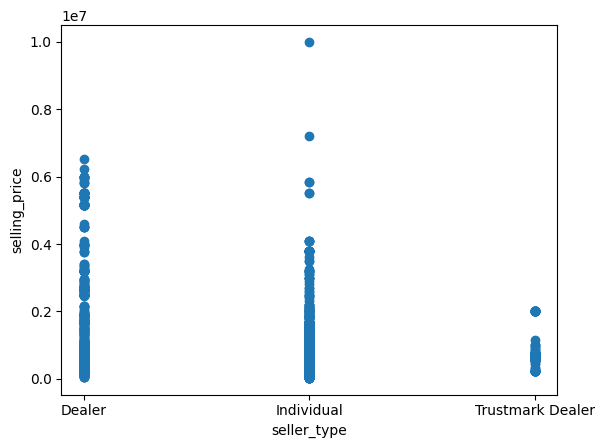

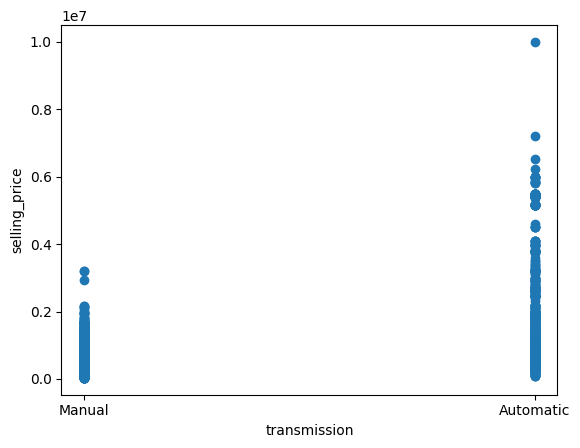

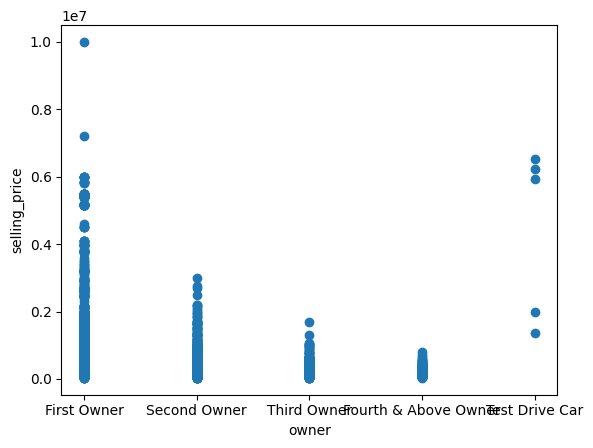

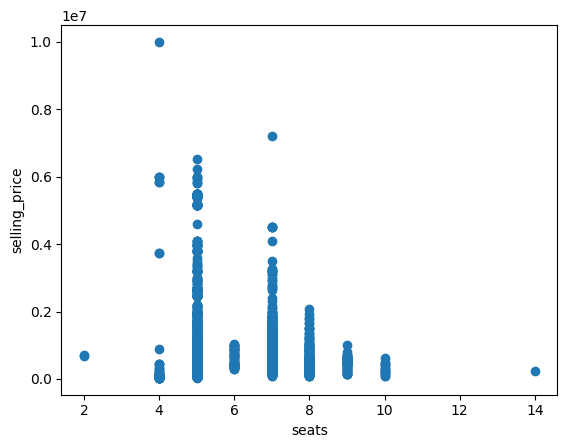

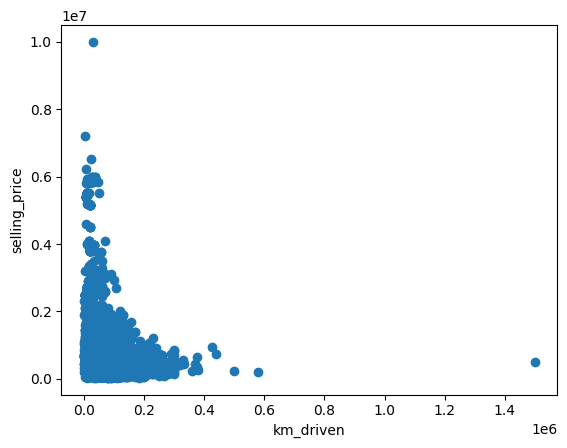

In [680]:
columnas_disc.append('km_driven')
for col in columnas_disc:# Crear la gráfica de puntos
    plt.scatter(train_df[col],train_df['selling_price'])

    # Agregar etiquetas y título
    plt.xlabel(col)
    plt.ylabel('selling_price')
    # Mostrar la gráfica
    plt.show()

In [681]:
# for col in ['marca', 'RPM']:# Crear la gráfica de puntos
#     plt.scatter(train_df[col],train_df['selling_price'])

#     # Agregar etiquetas y título
#     plt.xlabel(col)
#     plt.ylabel('selling_price')
#     # Mostrar la gráfica
#     plt.show()

# Preprocesamiento

In [686]:
def applytorque(row):
    print(row)
    return re.findall(r"-?(\d+(\.?\d+))", str(row))[0][0]
    
def onehot_encode():
    columns_to_encode = ['fuel', 'seller_type', 'owner', 'marca', 'transmission']
    for column in columns_to_encode:
        encoder = OneHotEncoder()
        encoded = encoder.fit_transform(train_df[[column]])
        encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out([column]))
        encoded_df = encoded_df.astype(int)
        train_df = pd.concat([train_df, encoded_df], axis=1)
    # train_df[['engine','RPM','transmission', 'fuel_encode', 'seller_type_encode', 'owner_encode',	'marca_encode']] =train_df[['engine','RPM','transmission_encode', 'fuel_encode', 'seller_type_encode', 'owner_encode',	'marca_encode']].astype(int)
    
def ordinal_encode(train_df, columns_to_encode):
    encoder = OrdinalEncoder()
    for column in columns_to_encode:
        train_df[column+'_encode'] = encoder.fit_transform(train_df[[column]])
        train_df[column+'_encode'] = train_df[column+'_encode'].astype(int)
    return train_df
    # train_df[['engine','RPM','transmission', 'fuel_encode', 'seller_type_encode', 'owner_encode',	'marca_encode']] =train_df[['engine','RPM','transmission_encode', 'fuel_encode', 'seller_type_encode', 'owner_encode',	'marca_encode']].astype(int)
    

def preproceso(train_df):
    # Eliminamos los datos nulos (al revisarlo solo existe una fila con datos nulos)
    train_df = train_df.dropna().reset_index(drop=True)
    # Obtenemos la primera palabara del nombre del coche para obtener un dato dicreto limitado sobre la marca del coche
    train_df['marca'] = train_df['name'].str.split().str[0]
    # Eliminamos las medidas para hacer numericos los campos implicados (asegurandonos que todas las filas tengan la misma medida)
    train_df['engine'] = train_df['engine'].str.split().str[0]
    train_df['max_power'] = train_df['max_power'].str.split().str[0]
    train_df['mileage'] = train_df['mileage'].str.split().str[0]
    # Para la columna torque se pueden obtener el torque en Nm y las Revoluciones Por Minuto, separamos los datos en campos distintos y para el RPM elegimos el valor mas alto si hay un intervalo 
    regex = train_df.torque.str.findall(r"-?(\d+(\.?\d+))")
    train_df['torque'] = [i[0][0] for i in regex]
    train_df['RPM'] = [i[-1][0] for i in regex]
    columns_to_encode = ['fuel', 'seller_type', 'owner', 'marca', 'transmission']
    train_df = ordinal_encode(train_df, columns_to_encode)
    # Transformamos en numéricos los datos dicretos (si solo tienen 2 valores OneHotEncoder por velocidad, sino OrdinalEncoder)
    columns_to_encode.append('name')
    columns_to_encode.append('id')
    train_df.drop(columns_to_encode,axis=1, inplace=True)
    train_df[['mileage','max_power','torque']] = train_df[['mileage','max_power','torque']].astype(float)
    # train_df = train_df.drop(columns='transmission')
    return train_df



Eliminamos los datos nulos (al revisarlo solo existe una fila con datos nulos)

Obtenemos la primera palabara del nombre del coche para obtener un dato dicreto limitado sobre la marca del coche

Eliminamos las medidas para hacer numericos los campos implicados (asegurandonos que todas las filas tengan la misma medida)

Para la columna torque se pueden obtener el torque en Nm y las Revoluciones Por Minuto, separamos los datos en campos distintos y para el RPM elegimos el valor mas alto si hay un intervalo 

Transformamos en numéricos los datos dicretos (si solo tienen 2 valores OneHotEncoder por velocidad, sino OrdinalEncoder)

In [687]:
train_df = preproceso(train_df)
train_df

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,RPM,fuel_encode,seller_type_encode,owner_encode,marca_encode,transmission_encode
0,2011,130000,68519,16.20,995,62.10,90.30,5.0,4200,3,0,0,4,1
1,2017,1050000,70000,22.32,1582,126.32,259.80,5.0,2750,1,0,0,11,1
2,2016,1100000,60000,15.40,2179,120.00,280.00,7.0,2800,1,1,0,19,1
3,2018,350000,10000,20.30,998,68.05,94.14,5.0,3500,3,1,2,11,1
4,2014,490000,50000,23.40,1248,74.00,190.00,5.0,2000,1,1,0,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722,2016,650000,29000,18.60,1197,81.83,114.70,5.0,4000,3,1,0,11,1
6723,2017,300000,10000,21.10,814,55.20,74.50,5.0,4000,3,1,0,11,1
6724,2017,693000,58559,25.20,1248,74.00,190.00,5.0,2000,1,0,0,20,1
6725,2017,580000,20000,21.40,1197,83.10,115.00,5.0,4000,3,1,0,20,1


In [688]:
# for column in ['fuel', 'seller_type', 'owner', 'marca', 'transmission']:
#     print(train_df[[column,column+'_encode']].drop_duplicates())

Nos guardamos qué valores numéricos corresponden a que valores discretos

In [689]:
test_df = preproceso(test_df)


# Pruebas de modelos

In [690]:

def paint(data_real, data_pred):
    # Generar algunos datos de ejemplo (reemplaza esto con tus datos reales)
    data_real = np.random.normal(loc=0, scale=1, size=1000)
    data_pred = np.random.normal(loc=0.5, scale=1.5, size=1000)

    # Calcular las estimaciones de densidad de kernel (KDE)
    kde_real = gaussian_kde(data_real)
    kde_pred = gaussian_kde(data_pred)

    # Crear una nueva figura y ejes
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5,2.5))

    # Crear el rango de valores para trazar el KDE
    x = np.linspace(min(data_real.min(), data_pred.min()), max(data_real.max(), data_pred.max()), 100)

    # Dibujar el KDE para los datos reales
    axs.plot(x, kde_real(x), label='Real')

    # Dibujar el KDE para los datos predichos
    axs.plot(x, kde_pred(x), label='Predicción')

    # Agregar leyenda
    axs.legend()

    # Mostrar la gráfica
    plt.show()

In [691]:
from sklearn.preprocessing import PolynomialFeatures
n_fit = 5000

# print(train_df[columns].head(20))
# print(train_df[columns].sample(frac=1).reset_index().head(20))
train_df = train_df.sample(frac=1).reset_index()
X = train_df
y = train_df['selling_price']
Y_fit = y[:n_fit]
Y_compare = y[n_fit:]
poly = PolynomialFeatures(degree=3)  # Grado del polinomio (puedes ajustarlo)
X = poly.fit_transform(X)
X_fit = X[:n_fit]
X_pred = X[n_fit:]

Regresion

In [692]:
train_df.selling_price

0        250000
1        425000
2        150000
3        680000
4        275000
         ...   
6722     710000
6723     250000
6724    1145000
6725     615000
6726     200000
Name: selling_price, Length: 6727, dtype: int64

LinearRegression()
MAE_fit 260247.00728587803
MAE_pred 266616.6109546353


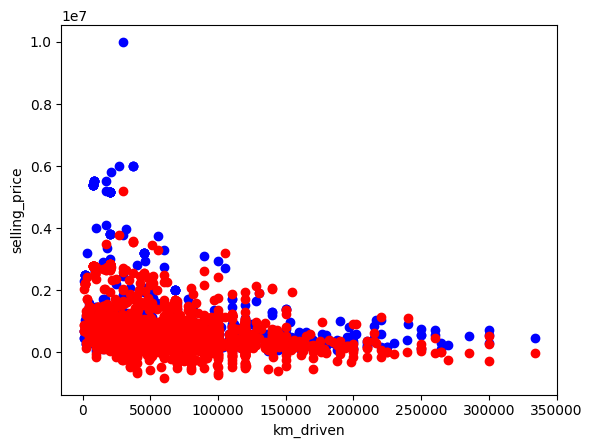

ElasticNet(alpha=100, l1_ratio=0.8)
MAE_fit 264025.3083678261
MAE_pred 270804.3551926826


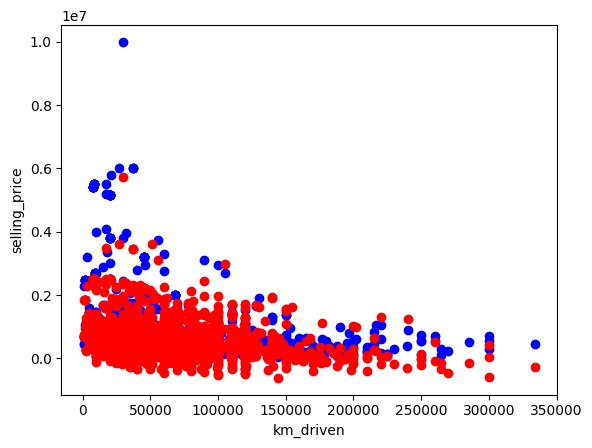

DecisionTreeRegressor()
MAE_fit 176016.8722452174
MAE_pred 210214.47960539005


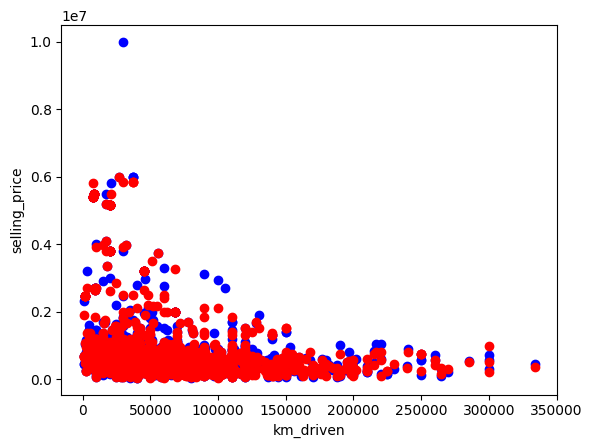

In [695]:
import statistics
from sklearn.linear_model import LinearRegression, ElasticNet, BayesianRidge, ARDRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

data_real = train_df['selling_price'][n_fit:]
Regressors = []
Regressors.append(LinearRegression())
# Regressors.append(ElasticNet())
# for a in range(1, 500, 100):
Regressors.append(ElasticNet(alpha=100, l1_ratio=0.8))
# Regressors.append(BayesianRidge())
# Regressors.append(Ridge(alpha=10))
# for i in range(20,50):
Regressors.append(DecisionTreeRegressor())
# Regressors.append(KNeighborsRegressor(n_neighbors=3))
# Regressors.append(KNeighborsRegressor(n_neighbors=6))
MAE_fit=[]
MAE_pred=[]

for r in Regressors:
    for i in range(10):
        regr = r
        train_df = train_df.sample(frac=1).reset_index(drop=True)
        X_fit = train_df[:n_fit].drop('selling_price', axis=1)
        Y_fit = train_df['selling_price'][:n_fit]
        X_pred = train_df[n_fit:].drop('selling_price', axis=1)
        data_real = train_df['selling_price'][n_fit:]
        data_pred  = regr.fit(X_fit, Y_fit).predict(X_pred)
        data_pred_fit = regr.fit(X_fit, Y_fit).predict(X_fit)
        # print(mean_absolute_error(data_real, data_pred))
        MAE_pred.append(mean_absolute_error(data_real, data_pred))
        MAE_fit.append(mean_absolute_error(Y_fit, data_pred_fit))
        # print("MAE: ", mean_absolute_error(data_real, data_pred))
        # print("MSE: ", mean_squared_error(data_real, data_pred))
        # print("RMSE: ", mean_squared_error(data_real, data_pred, squared=False))
    print(regr)
    print('MAE_fit', statistics.mean(MAE_fit))
    print('MAE_pred', statistics.mean(MAE_pred))
    # print(regr, statistics.stdev(MAE))
    # print(cross_val_score(regr, X_fit, Y_fit, cv=5, scoring='neg_mean_squared_error'))
        # # print(regr.coef_)
    # paint(data_real, data_pred)
    plt.scatter(train_df['km_driven'][n_fit:],data_real, color='b')
    plt.scatter(train_df['km_driven'][n_fit:],data_pred, color='r')

    # Agregar etiquetas y título
    plt.xlabel('km_driven') 
    plt.ylabel('selling_price')
    # Mostrar la gráfica
    plt.show()

# Conclusiones

Durante el preproceso se ha buscado sacar variables útiles como 'marca' y/o convertirlas a valores numéricos que se puedan usar.
En la prueba de modelos se han probado varias opciones pues los valores de error eran muy altos (alrededor de 200000) y queriamos comprobar si el problema era el modelo utilizado.



Finalmente usamos ElasticNet para regularizar el modelo e intentar evitar overfitting
Si comparamos el MAE para predecir con los datos de entreno y con datos nuevos no hay mucha diferencia por lo que podriamos intuir que no hay overfitting excesivo
De todas formas pondremos un alpha 100 y un l1_ratio a 0.8 por si las moscas (el 0.8 se ha puesto para dar más peso a lasso que ha ridge dado que en la visualización no parece que haya outliers importantes pero si puede que haya campos poc valiosos en nuestro dataset)

# Creación de *submission* para Kaggle

In [694]:
# X = train_df
# Y = train_df['selling_price']
# X_pred = train_df[n_fit:]
# data_real = train_df['selling_price'][n_fit:]
# data_pred  = regr.fit(X_fit, Y_fit).predict(X_pred)
# data_pred_fit = regr.fit(X_fit, Y_fit).predict(X_fit)